In [72]:
import torchaudio
from torchaudio.backend.sox_io_backend import load, info
from torchvision.io import read_video, VideoReader
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Video

In [11]:
vpath = 'zoom/GMT20210121-230953_Jack-Canno_1920x1200.mp4'
vid = Video('zoom/GMT20210121-230953_Jack-Canno_1920x1200.mp4', width=700, height=700)

In [60]:
apath = 'zoom/GMT20210121-230953_Jack-Canno.wav'

In [61]:
i = info(apath)
print(i.num_channels, i.num_frames, i.sample_rate)

1 54739968 32000


In [62]:
a, ch = load(apath)

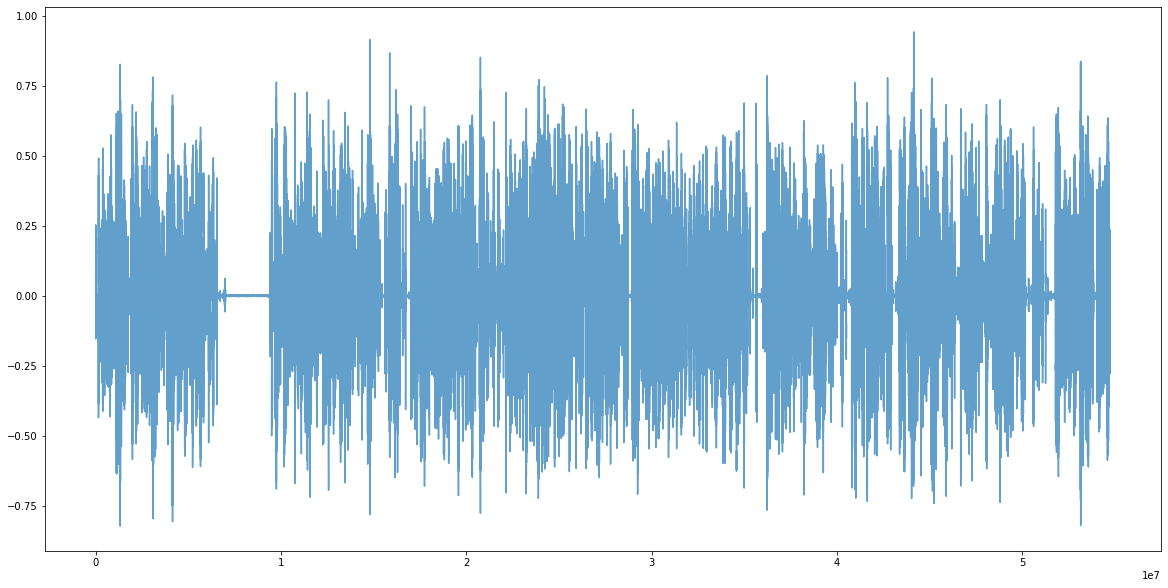

In [70]:
plt.figure(figsize=(20, 10))
plt.plot(a.t().numpy(), alpha=0.7);

In [100]:
a.size()

torch.Size([1, 54739968])

In [107]:
specgram = torchaudio.transforms.Spectrogram()(a[:5000])

In [108]:
print("Shape of spectrogram: {}".format(specgram.size()))

Shape of spectrogram: torch.Size([1, 201, 273700])


In [109]:
(specgram + 0.001).log2().numpy()

array([[[-9.965784 , -9.965784 , -9.965784 , ..., -8.5456705,
         -9.058091 , -8.516863 ],
        [-9.965784 , -9.965784 , -9.965784 , ..., -9.234192 ,
         -9.736186 , -9.40403  ],
        [-9.965784 , -9.965784 , -9.965784 , ..., -9.708595 ,
         -9.936156 , -9.958061 ],
        ...,
        [-9.965784 , -9.965784 , -9.965784 , ..., -9.965342 ,
         -9.965765 , -9.964212 ],
        [-9.965784 , -9.965784 , -9.965784 , ..., -9.964857 ,
         -9.965624 , -9.965451 ],
        [-9.965784 , -9.965784 , -9.965784 , ..., -9.965204 ,
         -9.965679 , -9.965784 ]]], dtype=float32)

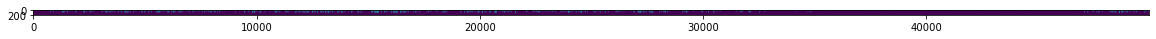

In [122]:
plt.figure(figsize=(20, 60))
plt.imshow((specgram + 0.0001).log2()[0,:,:50000].numpy());

In [32]:
a.numpy().flatten()

array([0.        , 0.        , 0.        , ..., 0.00027466, 0.00027466,
       0.00033569], dtype=float32)

In [53]:
s = pd.Series(a.numpy().flatten(), name='audio')

In [54]:
s

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
              ...   
54739963    0.000244
54739964    0.000244
54739965    0.000275
54739966    0.000275
54739967    0.000336
Name: audio, Length: 54739968, dtype: float32

In [67]:
a.t().numpy().shape

(54739968, 1)

In [68]:
a.t().numpy().flatten()

array([0.        , 0.        , 0.        , ..., 0.00027466, 0.00027466,
       0.00033569], dtype=float32)

KeyboardInterrupt: 

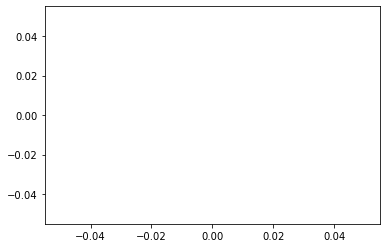

In [69]:
sns.lineplot(y=a.t().numpy().flatten());

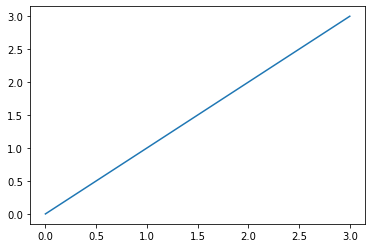

In [51]:
sns.lineplot(x=range(4), y=np.array([0,1,2,3]));

In [45]:
s.mean()

-0.0002144499

In [ ]:
v, a, d = read_video(vpath, pts_unit='sec')

In [5]:
reader = VideoReader(vpath, 'video')

RuntimeError: Not compiled with video_reader support

Shape of waveform: torch.Size([2, 276858])
Sample rate of waveform: 44100


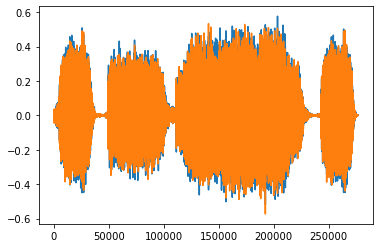

In [79]:
import requests


url = "https://pytorch.org/tutorials/_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
r = requests.get(url)

with open('steam-train-whistle-daniel_simon-converted-from-mp3.wav', 'wb') as f:
    f.write(r.content)

filename = "steam-train-whistle-daniel_simon-converted-from-mp3.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectrogram: torch.Size([2, 201, 1385])


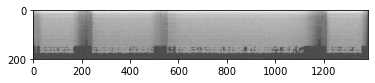

In [80]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

In [81]:
specgram.log2()[0,:,:]

tensor([[  1.1493,   2.5822,   1.9624,  ...,  -8.2920, -10.9102, -18.1629],
        [ -2.0016,   1.8569,   1.2608,  ...,  -8.2872, -12.2101, -15.4857],
        [  1.7717,  -0.4420,  -1.2407,  ...,  -9.4530, -13.5448, -16.1891],
        ...,
        [-18.4084, -28.1987, -26.3711,  ..., -25.1367, -25.4647, -31.2389],
        [-18.3845, -29.0052, -26.9796,  ..., -25.5301, -26.0996, -30.5198],
        [-18.3627, -33.9112, -36.3853,  ..., -27.2156, -25.3530, -29.1494]])

In [84]:
specgram

tensor([[[2.2180e+00, 5.9886e+00, 3.8972e+00,  ..., 3.1905e-03,
          5.1965e-04, 3.4075e-06],
         [2.4972e-01, 3.6223e+00, 2.3963e+00,  ..., 3.2012e-03,
          2.1105e-04, 2.1794e-05],
         [3.4146e+00, 7.3611e-01, 4.2317e-01,  ..., 1.4268e-03,
          8.3680e-05, 1.3384e-05],
         ...,
         [2.8742e-06, 3.2460e-09, 1.1522e-08,  ..., 2.7108e-08,
          2.1596e-08, 3.9461e-10],
         [2.9223e-06, 1.8560e-09, 7.5566e-09,  ..., 2.0639e-08,
          1.3907e-08, 6.4957e-10],
         [2.9666e-06, 6.1902e-11, 1.1141e-11,  ..., 6.4162e-09,
          2.3334e-08, 1.6794e-09]],

        [[1.3227e+01, 1.5658e+01, 8.4856e+00,  ..., 3.7371e-03,
          1.4899e-03, 3.5277e-05],
         [1.8560e+00, 6.1972e+00, 8.4161e+00,  ..., 2.8457e-03,
          8.2073e-04, 1.6974e-04],
         [3.8593e-01, 7.3274e-02, 1.8309e+00,  ..., 1.2316e-03,
          1.2940e-04, 1.1331e-04],
         ...,
         [1.4130e-07, 1.9757e-08, 1.6993e-09,  ..., 5.8348e-09,
          1.858